# Task # 2 Machine Learning : Digital Empowerment Pakistan

## Develop a machine learning model using naive bays which detects the email as spam or not

# Importing Necessory Modeules

In [1]:
import pandas as pd
import numpy as np

# Reading our data in pandas dataframe

In [4]:
df=pd.read_csv("E:\\data\\nlp\\csvfiles\\spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# There are 747 datapoints where email is smap

In [5]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

# labeling spam email as 1 and not spam as 0

In [6]:
df['spam']=df.Category.apply(lambda x: 1 if x=="spam" else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


# Checking null values

In [36]:
df.isnull().sum()

Category    0
Message     0
spam        0
dtype: int64

# Importing necessory modules for model building , we will be using  Naive bays for model building 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix as cmm, classification_report as cr
from sklearn.pipeline import Pipeline

# Splititng dataset into training and testing part

In [23]:
x_train,x_test,y_train,y_test=train_test_split(df.Message,df.spam,test_size=0.2)

# Create a sklearn pipeline for machine learning model , where at first stage our training  emails is passes into countvectorizer which will take some specific words from emails and  count them ,it will observe this words in spam email and not spam both , so when we pass any new email then it will detect those words and predict it as spam or not,and we use Multinomial Naive bays algorithm for modelbuilding

In [26]:
clf=Pipeline([
    ("vectorizer",CountVectorizer()),
    ("nb",MultinomialNB())
    
])
clf.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

# Wow !!!! We got accuracy of 98 percent 

In [27]:
clf.score(x_test,y_test)


0.9874439461883409

# Printing classification report to see the precision , recall and F1 scores , and you can see we got every value above 90 percent which is great

In [32]:
predicted=clf.predict(x_test)
print(cr(predicted,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       963
           1       0.94      0.97      0.95       152

    accuracy                           0.99      1115
   macro avg       0.97      0.98      0.97      1115
weighted avg       0.99      0.99      0.99      1115



# Plotting Heatmap to observe the accuracy of model

Text(70.72222222222221, 0.5, 'Predicted')

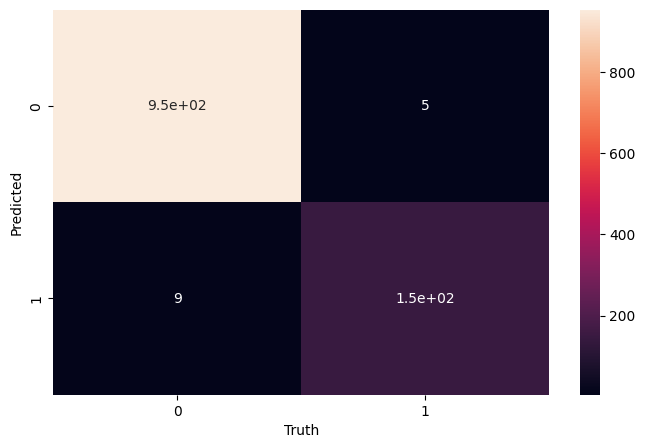

In [33]:
cm=cmm(y_test,predicted)
plt.figure(figsize=(8,5))
sb.heatmap(cm,annot=True)
plt.xlabel("Truth")
plt.ylabel("Predicted")

# testing the model

In [34]:
email=["Hey you are the winner , you win a price of 50000 dollars , visit our website to withdraw",
      "Hey arham, Here your fiverr id is verified ",
       "winner,winner,winner",
       "Hello, Arham Congratulations! Because you've successfully verified your identity, you'll see an Identity Verified badge on your profile, starting today."
      ,"Visit our website to claim your jackpot of 500000 dollars"      
      ]

In [35]:
clf.predict(email)

array([1, 0, 1, 0, 1], dtype=int64)

# Thank you 